# Classificação de Mensagens SMS - Spam ou Ham

Este projeto tem como objetivo desenvolver um modelo de aprendizado de máquina capaz de classificar mensagens SMS em duas categorias: **spam** (mensagens indesejadas) e **ham** (mensagens legítimas).  
Utilizamos um modelo supervisionado com o algoritmo **Naive Bayes Multinomial** e vetorização **TF-IDF**.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
# === 1. Carregar dados ===
df = pd.read_csv('../data/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_message'] = df['message'].apply(preprocess)

print("Antes do preprocessamento:\n", df['message'].head())
print("\nDepois do preprocessamento:\n", df['clean_message'].head())

Antes do preprocessamento:
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

Depois do preprocessamento:
 0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: clean_message, dtype: object


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

In [8]:
# === 3. Vetorização ===
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# === 4. Modelo ===
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
# === 5. Predição ===
y_pred = model.predict(X_test_vec)

# === 6. Avaliação ===
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))



Acurácia: 0.9668161434977578

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Matriz de Confusão:
 [[965   0]
 [ 37 113]]


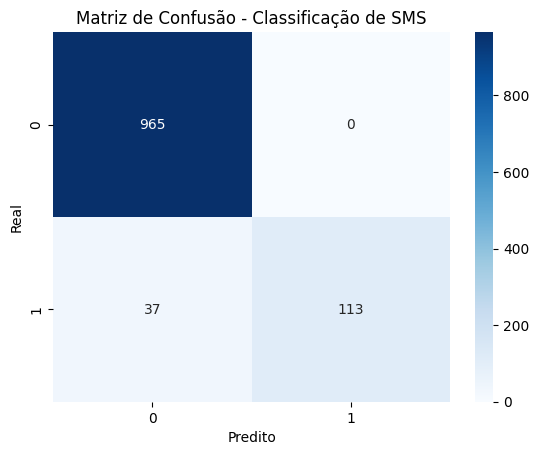

In [16]:

# # === 7. Visualização da Matriz de Confusão ===
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Classificação de SMS')
plt.savefig('confusion_matrix.png')
plt.show()


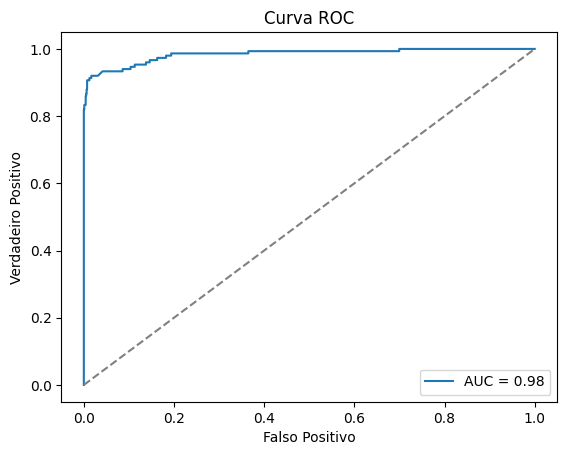

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()
